In [7]:
import torch
import torchvision
from tqdm import tqdm
from matplotlib import pyplot

In [8]:
# 定义全连接网络模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=784, out_features=512),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=512, out_features=256),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=256, out_features=128),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=128, out_features=64),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=64, out_features=32),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=32, out_features=10),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, input):
        output = self.model(input)
        return output


In [12]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"   # 检测并选择GPU或CPU设备
net = Net()  # 创建Net类的实例
net = net.to(device)  # 将模型移动到设备上
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=[0.5], std=[0.5])])   # 数据预处理：归一化

BATCH_SIZE = 128    # 批量大小
EPOCHS = 10     # 迭代次数  
lossF = torch.nn.CrossEntropyLoss()     # 多分类问题的损失函数为交叉熵

# 下载MNIST数据集并进行训练集和测试集的划分和加载
trainData = torchvision.datasets.MNIST('./data/', train=True, transform=transform, download=True)
testData = torchvision.datasets.MNIST('./data/', train=False, transform=transform)

trainDataLoader = torch.utils.data.DataLoader(dataset=trainData, batch_size=BATCH_SIZE, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(dataset=testData, batch_size=BATCH_SIZE)

In [13]:

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)    # 优化器为Adam，学习率为0.001

# 存储训练过程
history_0001 = {'Test Loss': [], 'Test Accuracy': []}

for epoch in range(1, EPOCHS + 1):
    processBar = tqdm(trainDataLoader, unit='step')
    net.train(True)
    for step, (trainImgs, labels) in enumerate(processBar):
        trainImgs = trainImgs.to(device)
        labels = labels.to(device)

        net.zero_grad()
        outputs = net(trainImgs)
        loss = lossF(outputs, labels)   # 计算损失
        predictions = torch.argmax(outputs, dim=1)  # 进行预测
        accuracy = torch.sum(predictions == labels) / labels.shape[0]   # 测试准确率
        loss.backward()     # 反向传播

        optimizer.step()
        processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" %
                                   (epoch, EPOCHS, loss.item(), accuracy.item()))

        if step == len(processBar) - 1:
            correct, totalLoss = 0, 0
            net.train(False)
            for testImgs, labels in testDataLoader:
                testImgs = testImgs.to(device)
                labels = labels.to(device)
                outputs = net(testImgs)
                loss = lossF(outputs, labels)
                predictions = torch.argmax(outputs, dim=1)

                totalLoss += loss
                correct += torch.sum(predictions == labels)
            testAccuracy = correct / (BATCH_SIZE * len(testDataLoader))     # 测试准确率
            testLoss = totalLoss / len(testDataLoader)      # 测试损失
            history_0001['Test Loss'].append(testLoss.item())
            history_0001['Test Accuracy'].append(testAccuracy.item())
            processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" %
                                       (epoch, EPOCHS, loss.item(), accuracy.item(), testLoss.item(),
                                        testAccuracy.item()))
    processBar.close()


[1/10] Loss: 1.6899, Acc: 0.6667, Test Loss: 1.6739, Test Acc: 0.7796: 100%|██████████| 469/469 [00:20<00:00, 23.19step/s]
[2/10] Loss: 1.5894, Acc: 0.8229, Test Loss: 1.6343, Test Acc: 0.8173: 100%|██████████| 469/469 [00:15<00:00, 30.56step/s]
[3/10] Loss: 1.4639, Acc: 0.8854, Test Loss: 1.5303, Test Acc: 0.9191: 100%|██████████| 469/469 [00:16<00:00, 28.54step/s]
[4/10] Loss: 1.4614, Acc: 0.9375, Test Loss: 1.5285, Test Acc: 0.9223: 100%|██████████| 469/469 [00:15<00:00, 29.92step/s]
[5/10] Loss: 1.4612, Acc: 0.9479, Test Loss: 1.5167, Test Acc: 0.9328: 100%|██████████| 469/469 [00:15<00:00, 30.18step/s]
[6/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.5144, Test Acc: 0.9349: 100%|██████████| 469/469 [00:15<00:00, 30.47step/s]
[7/10] Loss: 1.4762, Acc: 0.9479, Test Loss: 1.5125, Test Acc: 0.9378: 100%|██████████| 469/469 [00:15<00:00, 29.72step/s]
[8/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.5062, Test Acc: 0.9437: 100%|██████████| 469/469 [00:15<00:00, 30.13step/s]
[9/10] Loss: 1.4

In [16]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)    # 优化器为Adam，学习率为0.0005

# 存储训练过程
history_00005 = {'Test Loss': [], 'Test Accuracy': []}

for epoch in range(1, EPOCHS + 1):
    processBar = tqdm(trainDataLoader, unit='step')
    net.train(True)
    for step, (trainImgs, labels) in enumerate(processBar):
        trainImgs = trainImgs.to(device)
        labels = labels.to(device)

        net.zero_grad()
        outputs = net(trainImgs)
        loss = lossF(outputs, labels)   # 计算损失
        predictions = torch.argmax(outputs, dim=1)  # 进行预测
        accuracy = torch.sum(predictions == labels) / labels.shape[0]   # 测试准确率
        loss.backward()     # 反向传播

        optimizer.step()
        processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" %
                                   (epoch, EPOCHS, loss.item(), accuracy.item()))

        if step == len(processBar) - 1:
            correct, totalLoss = 0, 0
            net.train(False)
            for testImgs, labels in testDataLoader:
                testImgs = testImgs.to(device)
                labels = labels.to(device)
                outputs = net(testImgs)
                loss = lossF(outputs, labels)
                predictions = torch.argmax(outputs, dim=1)

                totalLoss += loss
                correct += torch.sum(predictions == labels)
            testAccuracy = correct / (BATCH_SIZE * len(testDataLoader))
            testLoss = totalLoss / len(testDataLoader)
            history_00005['Test Loss'].append(testLoss.item())
            history_00005['Test Accuracy'].append(testAccuracy.item())
            processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" %
                                       (epoch, EPOCHS, loss.item(), accuracy.item(), testLoss.item(),
                                        testAccuracy.item()))
    processBar.close()


  0%|          | 0/469 [00:00<?, ?step/s]

[1/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4988, Test Acc: 0.9512: 100%|██████████| 469/469 [00:20<00:00, 22.39step/s]
[2/10] Loss: 1.4612, Acc: 0.9583, Test Loss: 1.4959, Test Acc: 0.9541: 100%|██████████| 469/469 [00:21<00:00, 21.93step/s]
[3/10] Loss: 1.4612, Acc: 0.9271, Test Loss: 1.4993, Test Acc: 0.9510: 100%|██████████| 469/469 [00:21<00:00, 21.93step/s]
[4/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4989, Test Acc: 0.9509: 100%|██████████| 469/469 [00:21<00:00, 21.50step/s]
[5/10] Loss: 1.4612, Acc: 0.9792, Test Loss: 1.4958, Test Acc: 0.9539: 100%|██████████| 469/469 [00:21<00:00, 22.04step/s]
[6/10] Loss: 1.4612, Acc: 0.9583, Test Loss: 1.4936, Test Acc: 0.9561: 100%|██████████| 469/469 [00:20<00:00, 22.90step/s]
[7/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4963, Test Acc: 0.9533: 100%|██████████| 469/469 [00:23<00:00, 20.35step/s]
[8/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4953, Test Acc: 0.9550: 100%|██████████| 469/469 [00:21<00:00, 22.15step/s]
[9/10] Loss: 1.4

In [17]:

optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)    # 优化器为Adam，学习率为0.0001

# 存储训练过程
history_00001 = {'Test Loss': [], 'Test Accuracy': []}

for epoch in range(1, EPOCHS + 1):
    processBar = tqdm(trainDataLoader, unit='step')
    net.train(True)
    for step, (trainImgs, labels) in enumerate(processBar):
        trainImgs = trainImgs.to(device)
        labels = labels.to(device)

        net.zero_grad()
        outputs = net(trainImgs)
        loss = lossF(outputs, labels)   # 计算损失
        predictions = torch.argmax(outputs, dim=1)  # 进行预测
        accuracy = torch.sum(predictions == labels) / labels.shape[0]   # 测试准确率
        loss.backward()     # 反向传播

        optimizer.step()
        processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" %
                                   (epoch, EPOCHS, loss.item(), accuracy.item()))

        if step == len(processBar) - 1:
            correct, totalLoss = 0, 0
            net.train(False)
            for testImgs, labels in testDataLoader:
                testImgs = testImgs.to(device)
                labels = labels.to(device)
                outputs = net(testImgs)
                loss = lossF(outputs, labels)
                predictions = torch.argmax(outputs, dim=1)

                totalLoss += loss
                correct += torch.sum(predictions == labels)
            testAccuracy = correct / (BATCH_SIZE * len(testDataLoader))
            testLoss = totalLoss / len(testDataLoader)
            history_00001['Test Loss'].append(testLoss.item())
            history_00001['Test Accuracy'].append(testAccuracy.item())
            processBar.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" %
                                       (epoch, EPOCHS, loss.item(), accuracy.item(), testLoss.item(),
                                        testAccuracy.item()))
    processBar.close()


  0%|          | 0/469 [00:00<?, ?step/s]

[1/10] Loss: 1.4612, Acc: 1.0000, Test Loss: 1.4876, Test Acc: 0.9623: 100%|██████████| 469/469 [00:20<00:00, 23.03step/s]
[2/10] Loss: 1.4612, Acc: 0.9479, Test Loss: 1.4867, Test Acc: 0.9634: 100%|██████████| 469/469 [00:20<00:00, 22.62step/s]
[3/10] Loss: 1.4612, Acc: 0.9896, Test Loss: 1.4875, Test Acc: 0.9624: 100%|██████████| 469/469 [00:21<00:00, 22.16step/s]
[4/10] Loss: 1.4612, Acc: 0.9792, Test Loss: 1.4862, Test Acc: 0.9639: 100%|██████████| 469/469 [00:21<00:00, 21.85step/s]
[5/10] Loss: 1.4612, Acc: 0.9688, Test Loss: 1.4868, Test Acc: 0.9631: 100%|██████████| 469/469 [00:20<00:00, 22.95step/s]
[6/10] Loss: 1.4612, Acc: 0.9792, Test Loss: 1.4859, Test Acc: 0.9641: 100%|██████████| 469/469 [00:20<00:00, 22.62step/s]
[7/10] Loss: 1.4612, Acc: 1.0000, Test Loss: 1.4875, Test Acc: 0.9621: 100%|██████████| 469/469 [00:21<00:00, 21.73step/s]
[8/10] Loss: 1.4612, Acc: 1.0000, Test Loss: 1.4871, Test Acc: 0.9626: 100%|██████████| 469/469 [00:22<00:00, 21.27step/s]
[9/10] Loss: 1.4

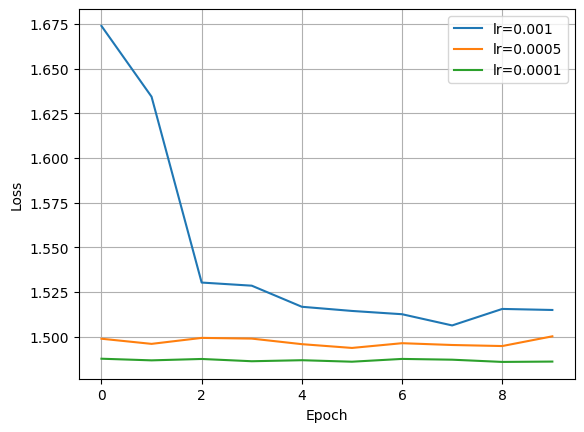

In [18]:
# 比较不同学习率的测试损失曲线
pyplot.plot(history_0001['Test Loss'], label='lr=0.001')
pyplot.plot(history_00005['Test Loss'], label='lr=0.0005')
pyplot.plot(history_00001['Test Loss'], label='lr=0.0001')
pyplot.legend(loc='best')
pyplot.grid(True)
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.show()



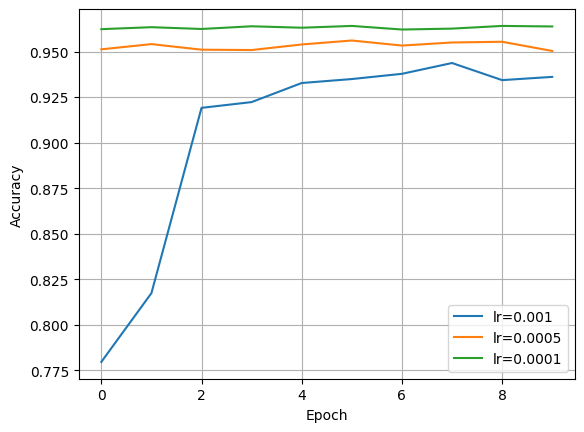

In [19]:
# 比较不同学习率的测试准确率曲线
pyplot.plot(history_0001['Test Accuracy'],  label='lr=0.001')
pyplot.plot(history_00005['Test Accuracy'], label='lr=0.0005')
pyplot.plot(history_00001['Test Accuracy'], label='lr=0.0001')
pyplot.legend(loc='best')
pyplot.grid(True)
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.show()